In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [4]:
confidences_all = load_pickle('../../data/label_studio/all_paddle_confidences.pkl')
offsets = load_pickle('../../data/label_studio/both_offsets.pkl')
labels = load_pickle('../../data/label_studio/both_labels.pkl')
preds = load_pickle('../../data/label_studio/both_paddle_predictions.pkl')

In [5]:
# because i only stored confidences for all orientations, we first need to retrieve the ones corresponding to the correct orientations

In [7]:
confidences = []
for idx, offset in enumerate(offsets):
    confidences += [confidences_all[4*idx + offset]]

Text(0.5, 1.0, 'paddle confidences')

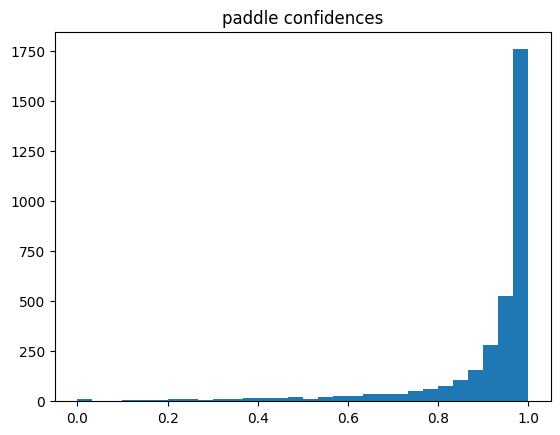

In [8]:
# investigate distribution of confidences

plt.hist(confidences, bins='rice')
plt.title('paddle confidences')

In [9]:
geq_x = np.arange(0.0, 1.0, 0.01)

In [10]:
confidences = np.asarray(confidences)

In [11]:
# compute levenshtein distance 

In [12]:
import sys
sys.path.append('../../')
from ocr_ensemble.evaluation import levenshtein as lev

In [13]:
levs = np.asarray([lev(gt.lower(), pred.lower()) for gt, pred in zip(labels, preds)])

In [16]:
levs

array([1., 3., 2., ..., 8., 5., 0.])

In [17]:
means = []
stds = []
cnts = []
maxs = []
for x in geq_x:
    means += [np.mean(levs[confidences >= x])]
    stds += [np.std(levs[confidences >= x])]
    cnts += [np.sum(confidences >= x)]
    maxs += [np.max(levs[confidences >= x])]

means = np.asarray(means)
stds = np.asarray(stds)
cnts = np.asarray(cnts)
maxs = np.asarray(maxs)

In [18]:
def gaussian_confidence_plot(means, stds, cnts, geq_x):
    upper = means + 1.96*stds/np.sqrt(cnts)
    lower = means - 1.96*stds/np.sqrt(cnts)
    x = np.arange(len(means))
    plt.plot(x, means)
    plt.fill_between(x, lower, upper, color='blue', alpha=0.5)
    plt.plot(x, [1]*len(x), 'k--')
    plt.plot(x, [0.8]*len(x), 'k--')
    plt.plot(x, [0.6]*len(x), 'k--')
    plt.xticks(np.arange(0, len(geq_x), 5),  ['%.0f'%(100*b) for b in geq_x[::5]])
    plt.xlim(0, len(geq_x)-1)
    plt.ylim(0, upper.max())

In [19]:
def max_plot(maxs, geq_x):
    x = np.arange(len(means))
    plt.plot(x, maxs)
    #plt.plot(x, [1]*len(x), 'k--')
    #plt.plot(x, [0.8]*len(x), 'k--')
    #plt.plot(x, [0.6]*len(x), 'k--')
    plt.xticks(np.arange(0, len(geq_x), 5),  ['%.0f'%(100*b) for b in geq_x[::5]])
    plt.xlim(0, len(geq_x)-1)
    plt.ylim(0, maxs.max())

Text(0.5, 0, 'confidences >= x')

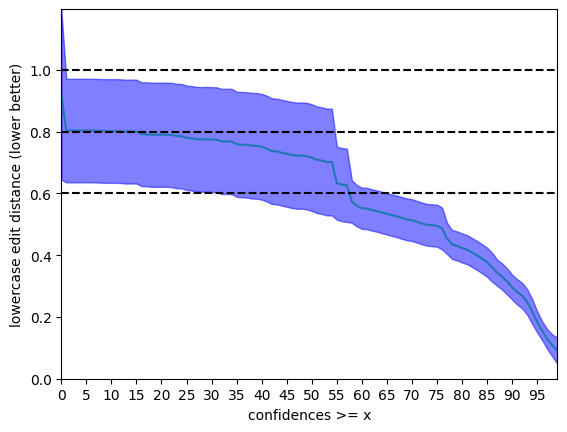

In [21]:
gaussian_confidence_plot(means, stds, cnts, geq_x)
plt.ylabel('lowercase edit distance (lower better)')
plt.xlabel('confidences >= x')

Text(0.5, 0, 'confidences >= x')

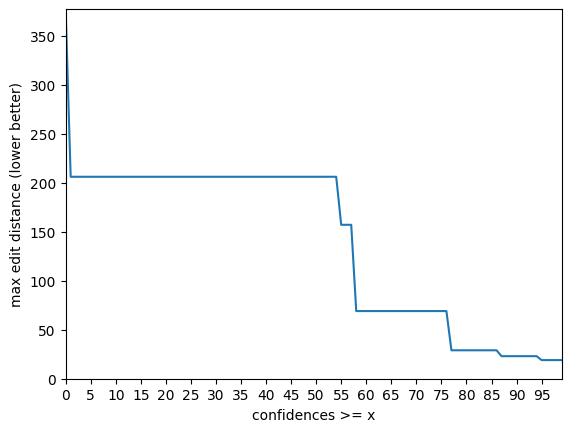

In [22]:
max_plot(maxs, geq_x)
plt.ylabel('max edit distance (lower better)')
plt.xlabel('confidences >= x')

(0.0, 70.0)

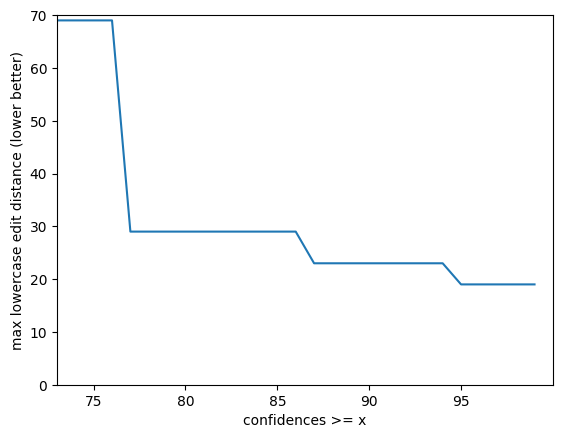

In [31]:
max_plot(maxs, geq_x)
plt.ylabel('max lowercase edit distance (lower better)')
plt.xlabel('confidences >= x')
plt.xlim(73, 100)
plt.ylim(0, 70)

In [24]:
upper = means + 1.96*stds/np.sqrt(cnts)

In [25]:
geq_x[upper <= 0.8]

array([0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [32]:
preds = np.asarray(preds)
labels = np.asarray(labels)

preds_keep = preds[confidences > 0.85]
labels_keep = labels[confidences > 0.85]

In [33]:
for _ in range(50):
    idx = np.random.randint(len(preds_keep))
    print('%s\n%s'%(labels_keep[idx], preds_keep[idx]))

WELCOME
WELCOME
pieces
pieces
ENERGY!!
ENERGY!!
ARRAN
ARRAN
USA
USA
Think of what you'd
Think of what you'd
MUSIC
MUSIC
GUARDIAN
GUARDIAN
DANCE
DANCE
apoptotic cell death in cancer cells
 apoptotic cll death in cancer cells
Office Use only:
Office Use only:
contains carbohydrates
CONTAINS CARBOHYDRATES
TAS
TAS
"WITCH-MARK"
"WITCH-MARK."
DANUBE
DANUBE
1
1
FUTURE
FUTURIE
rry Don Auctioneers
rry Don Auctioneers
spark baby's curiosity
spark baby's curiosity
STORIES FOR THE BLUE
STORIES FOR THE BLUE
LEIGHTON
LEIGHTON
#FREE
#FREE
Official
Official
BEACH ESCAPE
BEACH ESCAPE
Home
Home
2
2
by Getty
by Getty
lebih tinggi
lebih tinggi
NON
NON
5%
5%
www.myNYCB.com
www.myNYCB.com
OUTER
GUTTER
maxx
max
by Getty Images
by Getty Images
1
1
a
a
RECEIPT
RICEIPT
1,304
1,304
won't die!
won't die!
NIKE
NIKE
130
30
jAZZ
jAZZ
GLOW
GLOW
TRUST
TRUST
lenging them to get ready for competition in
lenging them to get ready for competition in
JANSPORT.
JANSPORT.
DENNY
DENNY
black cohosh
Black Cohosh
VENT
VENT
Ethic

In [52]:
mask = confidences > 0.85
idx = np.argmax(levs[mask])
levs[mask][idx]

29.0

In [53]:
print(labels[mask][idx])
print(preds[mask][idx])

- original artwork - CLEANCUTCREATIVE - clean cutting files
C UTCR E ATIVE - clean cutting file .


In [54]:
cnts[geq_x >= 0.85]/len(preds)

array([0.82435249, 0.8133373 , 0.8052992 , 0.79309318, 0.77850551,
       0.76242929, 0.74010122, 0.72134564, 0.69038404, 0.65584996,
       0.61923191, 0.56385829, 0.50401905, 0.43792795, 0.34176838])